# Mount drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/Colab Notebooks/asteroid_project"

/content/drive/MyDrive/Colab Notebooks/asteroid_project


# Dependencies

In [ ]:
import pandas as pd  # general purpose
import numpy as np  # general purpose
from matplotlib import pyplot as plt  # Use for EDA
from mpl_toolkits.mplot3d import Axes3D  # Use for EDA
from sklearn.preprocessing import StandardScaler  # Use in Standardization
from sklearn.cluster import KMeans  # Kmeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import silhouette_score

# Read Dataset

In [ ]:
L4_tro_df = pd.read_csv('L4_tro_df.csv', low_memory=False)

In [ ]:
L4_tro_families_df = L4_tro_df[L4_tro_df['is_family'] == 1]

In [ ]:
L4_tro_families_df

,Asteroid_ID,H,a,e,sin_i,"g(""/y)","s(""/y)",is_family_004,is_family_005,is_family_006,is_family_008,is_family
1,624,7.17,5.295619,0.0544,0.3259,335.65,-12.89,1,0,0,0,1
22,3548,9.84,5.297925,0.0437,0.1291,377.04,-16.45,0,1,0,0,1
56,5258,10.21,5.289203,0.0589,0.1224,372.54,-15.54,0,1,0,0,1
71,8060,10.80,5.292010,0.0605,0.1273,338.69,-15.89,0,1,0,0,1
81,9799,9.47,5.225344,0.0489,0.5262,214.22,0.74,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2692,398095,13.26,5.292311,0.0564,0.3248,334.92,-12.38,1,0,0,0,1
2693,398104,13.91,5.285795,0.0543,0.3242,333.63,-11.18,1,0,0,0,1
2699,398616,13.70,5.312361,0.0540,0.1282,323.33,-20.03,0,1,0,0,1
2703,398800,13.68,5.286898,0.0425,0.1270,372.30,-14.35,0,1,0,0,1


In [ ]:
L4_tro_families_df = L4_tro_families_df.reset_index(drop=True)

In [ ]:
# Define the one-hot encoded columns
one_hot_columns = ['is_family_004', 'is_family_005', 'is_family_006', 'is_family_008']

# Create the 'id' column based on the one-hot columns
L4_tro_families_df.loc[:, 'Family_ID'] = (
    L4_tro_families_df[one_hot_columns]
    .idxmax(axis=1)
    .str.extract('(\d+)')
    .astype(int)
)

## $e$ vs $a$

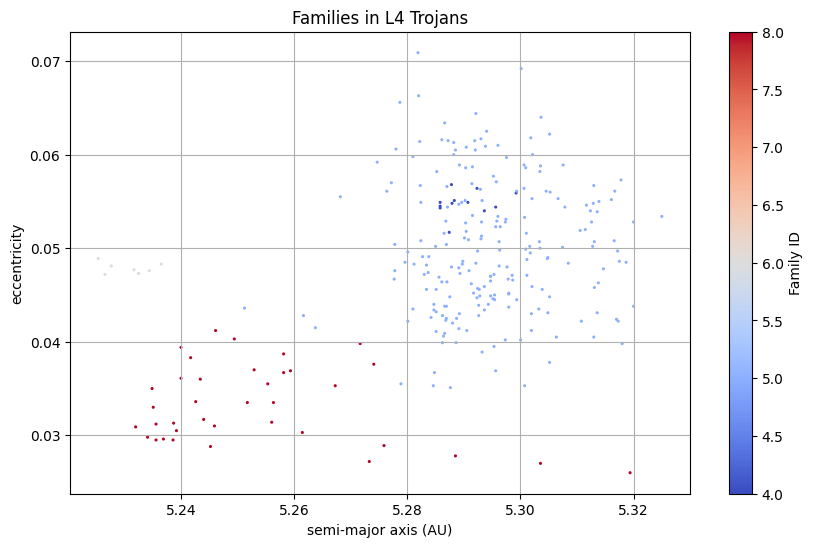

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(L4_tro_families_df['a'], L4_tro_families_df['e'], c=L4_tro_families_df['Family_ID'], cmap='coolwarm', s=1.5)

# Add a color bar
plt.colorbar(scatter, label='Family ID')

plt.xlabel('semi-major axis (AU)')
plt.ylabel('eccentricity')
plt.title('Families in L4 Trojans')

plt.grid()
plt.show()

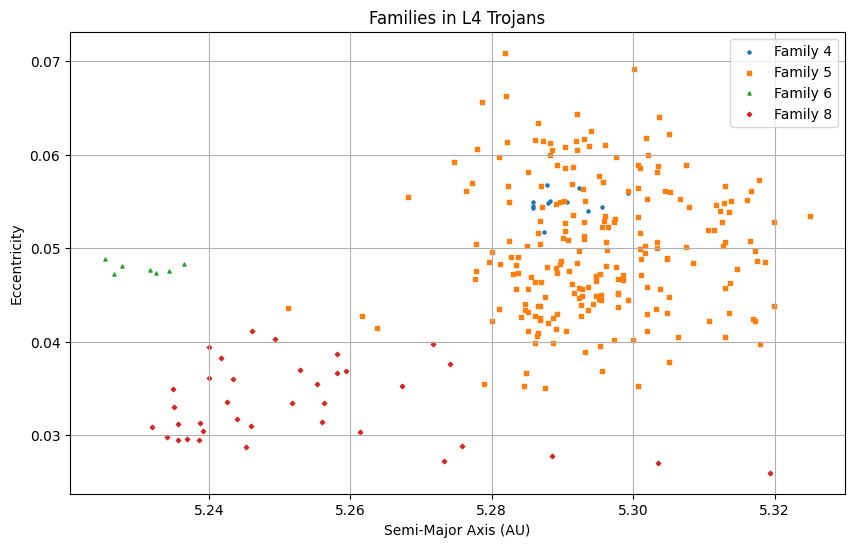

In [ ]:
# Define marker styles for different Family_IDs
markers = {
    4: 'o',  # Circle
    5: 's',  # Square
    6: '^',  # Triangle
    8: 'D'   # Diamond
}

plt.figure(figsize=(10, 6))

# Loop through unique Family_IDs and plot each one with a specific marker
for family_id in L4_tro_families_df['Family_ID'].unique():
    subset = L4_tro_families_df[L4_tro_families_df['Family_ID'] == family_id]
    plt.scatter(subset['a'], subset['e'], label=f'Family {family_id}',
                marker=markers[family_id], s=5)  # Adjust size as needed

plt.legend()

plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Eccentricity')
plt.title('Families in L4 Trojans')

plt.grid()
plt.show()

## $\sin$ $i$ vs $a$

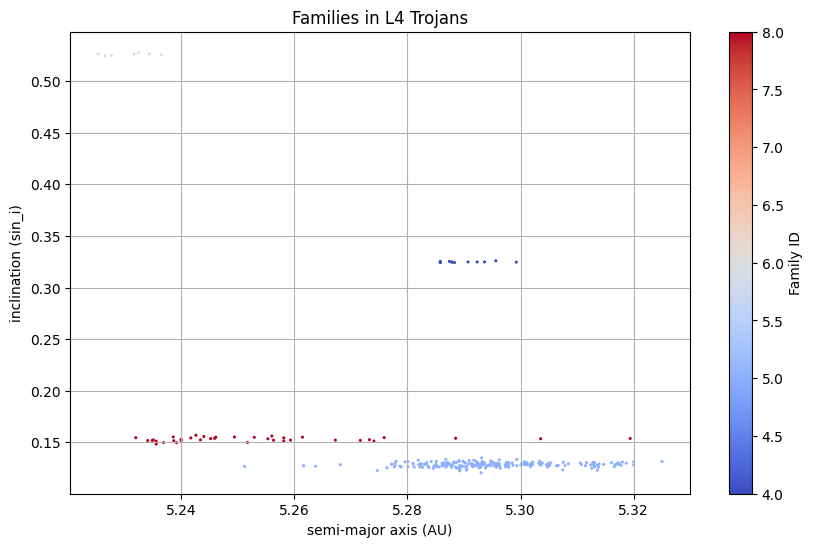

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(L4_tro_families_df['a'], L4_tro_families_df['sin_i'], c=L4_tro_families_df['Family_ID'], cmap='coolwarm', s=1.5)

# Add a color bar
plt.colorbar(scatter, label='Family ID')

plt.xlabel('semi-major axis (AU)')
plt.ylabel('inclination (sin_i)')
plt.title('Families in L4 Trojans')

plt.grid()
plt.show()

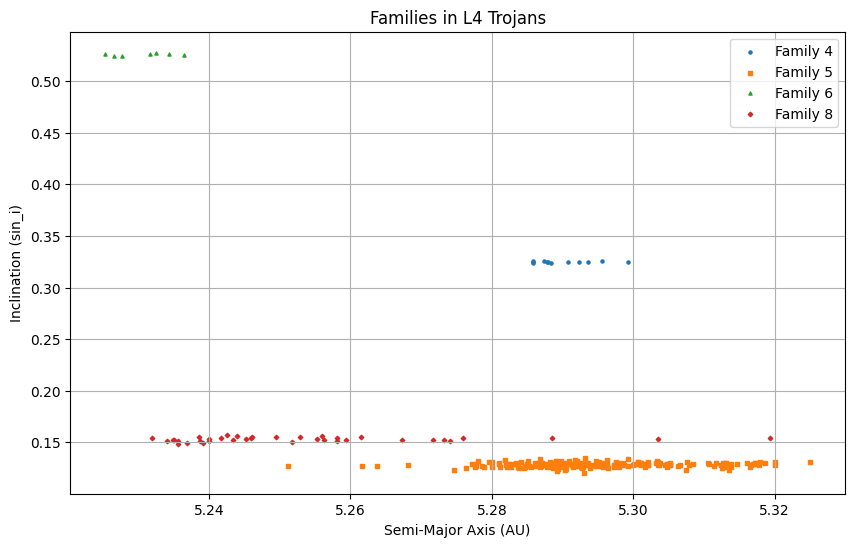

In [ ]:
# Define marker styles for different Family_IDs
markers = {
    4: 'o',  # Circle
    5: 's',  # Square
    6: '^',  # Triangle
    8: 'D'   # Diamond
}

plt.figure(figsize=(10, 6))

# Loop through unique Family_IDs and plot each one with a specific marker
for family_id in L4_tro_families_df['Family_ID'].unique():
    subset = L4_tro_families_df[L4_tro_families_df['Family_ID'] == family_id]
    plt.scatter(subset['a'], subset['sin_i'], label=f'Family {family_id}',
                marker=markers[family_id], s=5)  # Adjust size as needed

plt.legend()

plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Inclination (sin_i)')
plt.title('Families in L4 Trojans')

plt.grid()
plt.show()

## $H$ vs $a$

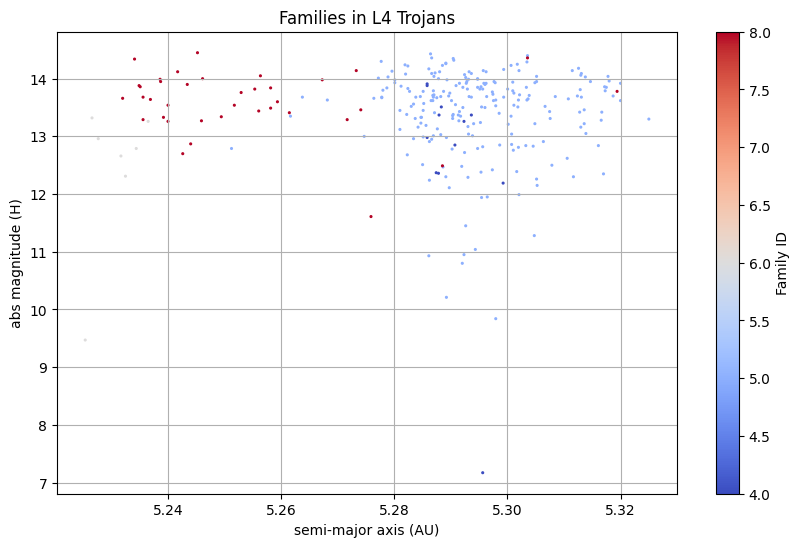

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(L4_tro_families_df['a'], L4_tro_families_df['H'], c=L4_tro_families_df['Family_ID'], cmap='coolwarm', s=1.5)

# Add a color bar
plt.colorbar(scatter, label='Family ID')

plt.xlabel('semi-major axis (AU)')
plt.ylabel('abs magnitude (H)')
plt.title('Families in L4 Trojans')

plt.grid()
plt.show()

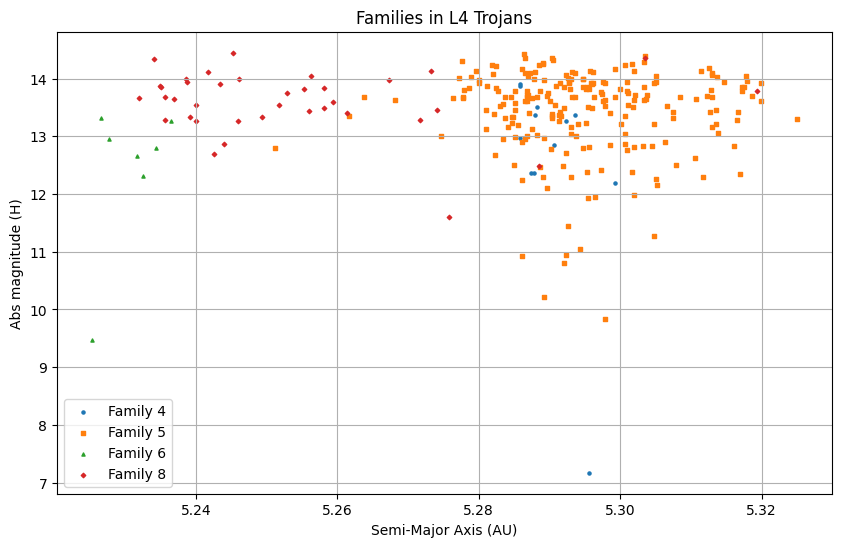

In [ ]:
# Define marker styles for different Family_IDs
markers = {
    4: 'o',  # Circle
    5: 's',  # Square
    6: '^',  # Triangle
    8: 'D'   # Diamond
}

plt.figure(figsize=(10, 6))

# Loop through unique Family_IDs and plot each one with a specific marker
for family_id in L4_tro_families_df['Family_ID'].unique():
    subset = L4_tro_families_df[L4_tro_families_df['Family_ID'] == family_id]
    plt.scatter(subset['a'], subset['H'], label=f'Family {family_id}',
                marker=markers[family_id], s=5)  # Adjust size as needed

plt.legend()

plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Abs magnitude (H)')
plt.title('Families in L4 Trojans')

plt.grid()
plt.show()

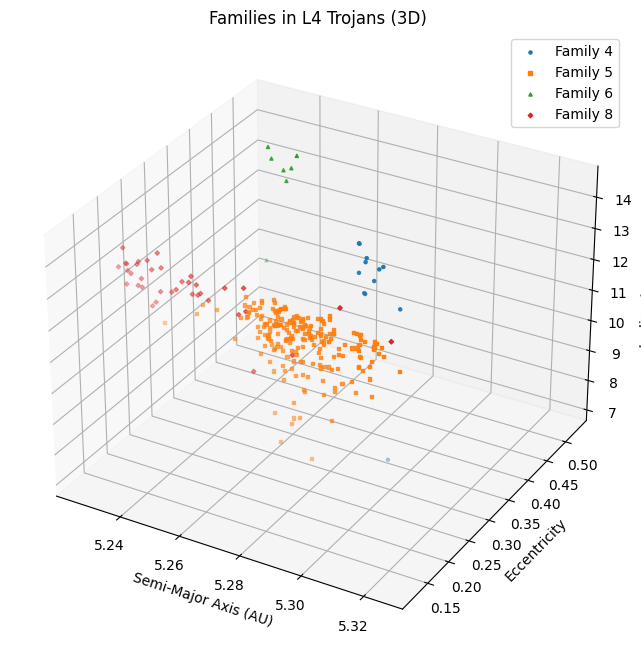

In [ ]:
# Define marker styles for different Family_IDs
markers = {
    4: 'o',  # Circle
    5: 's',  # Square
    6: '^',  # Triangle
    8: 'D'   # Diamond
}

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through unique Family_IDs and plot each one with a specific marker
for family_id in L4_tro_families_df['Family_ID'].unique():
    subset = L4_tro_families_df[L4_tro_families_df['Family_ID'] == family_id]
    ax.scatter(subset['a'], subset['sin_i'], subset['H'],
               label=f'Family {family_id}',
               marker=markers[family_id],
               s=5)  # Adjust size as needed

'''
target_id = 20961
target_point = families_df[families_df['Asteroid_ID'] == target_id]

if not target_point.empty:
    ax.scatter(target_point['a'].values[0],
               target_point['e'].values[0],
               target_point['sin_i'].values[0],
               color='black',
               s=30,  # Size of the black dot
               edgecolor='white')  # Optional: add edge color for visibility
'''

# Set labels and title
ax.set_xlabel('Semi-Major Axis (AU)')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Inclination (sin_i)')
ax.set_title('Families in L4 Trojans (3D)')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

# Standardization

Denote $z(\cdot)$ as the standardizing function.

Remark: Standardizing the data ensures that each feature contributes equally to the distance calculations when using Euclidean distance. This notebook will not cover the metric distance (Zappala V. 1990) mentioned in the paper. It will be covered in later work.

Recall:


*   $a$: proper semi major axis
*   $e$: eccentricity
  *   $q=a(1-e)$, where $q$ is the perihelion of elliptical orbit.
*   $\sin i$: inclination
*   $H$: abs magnitude
  *   $d=10^{(3.1236 - 0.5 \log(A) - 0.2H)}$, where $A$ is the geometric albedo and $d$ is the diameter.
*   $g("/y)$: rate of the perihelion
*   $s("/y)$: rate of the node

In [ ]:
Z = L4_tro_families_df[['a', 'e', 'sin_i', 'H', 'g("/y)', 's("/y)']]

In [ ]:
# Standardize the data
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

In [ ]:
Z_scaled

array([[ 0.38758845,  0.73534415,  2.40417298, -7.33050215, -0.4191581 ,
         0.45857452],
       [ 0.49713603, -0.47957948, -0.29365675, -4.17846249,  0.61952435,
        -0.41419518],
       [ 0.0827604 ,  1.24629335, -0.38550359, -3.74166298,  0.50659681,
        -0.19109956],
       ...,
       [ 1.18299916,  0.68992645, -0.30599438,  0.37841882, -0.72832862,
        -1.29186808],
       [-0.02678718, -0.6158326 , -0.32244457,  0.35480804,  0.50057401,
         0.10064088],
       [-1.39375049, -1.04730081,  0.05316791,  0.13050559,  0.17684838,
         1.1891514 ]])

In [ ]:
scaled_families_df = pd.DataFrame(Z_scaled, columns=['a', 'e', 'sin_i', 'H', 'g("/y)', 's("/y)'])

In [ ]:
scaled_families_df['Asteroid_ID'] = L4_tro_families_df['Asteroid_ID']

In [ ]:
scaled_families_df = scaled_families_df[['Asteroid_ID', 'a', 'e', 'sin_i', 'H', 'g("/y)', 's("/y)']]

In [ ]:
scaled_families_df['Family_ID'] = L4_tro_families_df['Family_ID']

In [ ]:
scaled_families_df.head(10)

,Asteroid_ID,a,e,sin_i,H,"g(""/y)","s(""/y)",Family_ID
0,624,0.387588,0.735344,2.404173,-7.330502,-0.419158,0.458575,4
1,3548,0.497136,-0.479579,-0.293657,-4.178462,0.619524,-0.414195,5
2,5258,0.082760,1.246293,-0.385504,-3.741663,0.506597,-0.191100,5
3,8060,0.216123,1.427964,-0.318332,-3.045145,-0.342869,-0.276906,5
4,9799,-2.951231,0.110851,5.149982,-4.615262,-3.466445,3.800106,6
5,9818,-0.064891,-0.173010,-0.285432,-2.891675,0.477487,0.105544,5
6,13862,0.244700,-0.456871,-0.314219,-2.277794,0.560049,-0.164132,5
7,18060,0.230411,-0.366035,-0.293657,-2.868064,0.550513,-0.151874,5
8,20961,-0.550710,-2.160035,0.055910,-2.088908,0.325913,0.708638,8
9,24380,0.325670,-0.445516,-0.310107,-2.761815,0.577867,-0.240132,5


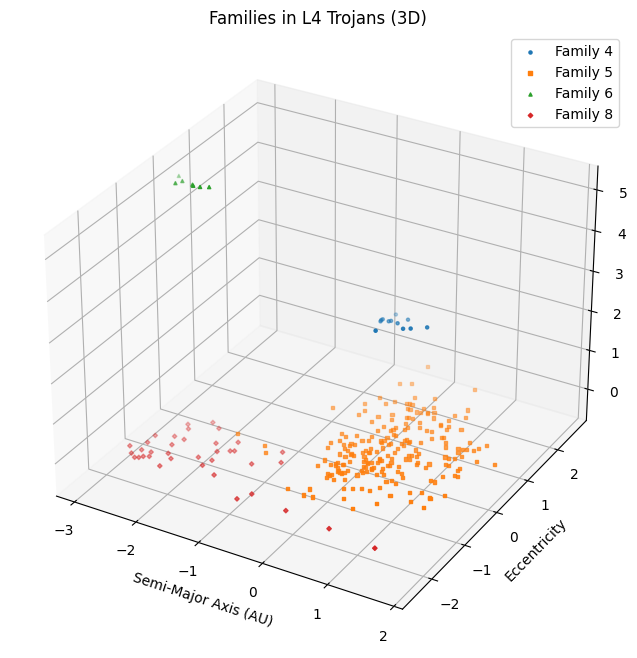

In [ ]:
# Define marker styles for different Family_IDs
markers = {
    4: 'o',  # Circle
    5: 's',  # Square
    6: '^',  # Triangle
    8: 'D'   # Diamond
}

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through unique Family_IDs and plot each one with a specific marker
for family_id in scaled_families_df['Family_ID'].unique():
    subset = scaled_families_df[scaled_families_df['Family_ID'] == family_id]
    ax.scatter(subset['a'], subset['e'], subset['sin_i'],
               label=f'Family {family_id}',
               marker=markers[family_id],
               s=5)  # Adjust size as needed

'''
target_id = 20961
target_point = families_df[families_df['Asteroid_ID'] == target_id]

if not target_point.empty:
    ax.scatter(target_point['a'].values[0],
               target_point['e'].values[0],
               target_point['sin_i'].values[0],
               color='black',
               s=30,  # Size of the black dot
               edgecolor='white')  # Optional: add edge color for visibility
'''

# Set labels and title
ax.set_xlabel('Semi-Major Axis (AU)')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Inclination (sin_i)')
ax.set_title('Families in L4 Trojans (3D)')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
correlation_matrix = scaled_families_df[['a', 'e', 'sin_i', 'H', 'g("/y)', 's("/y)']].corr()

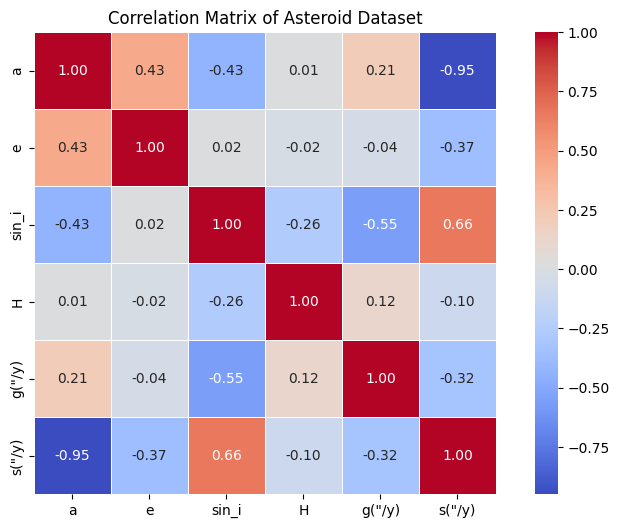

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)

# Set the title
plt.title('Correlation Matrix of Asteroid Dataset')
plt.show()

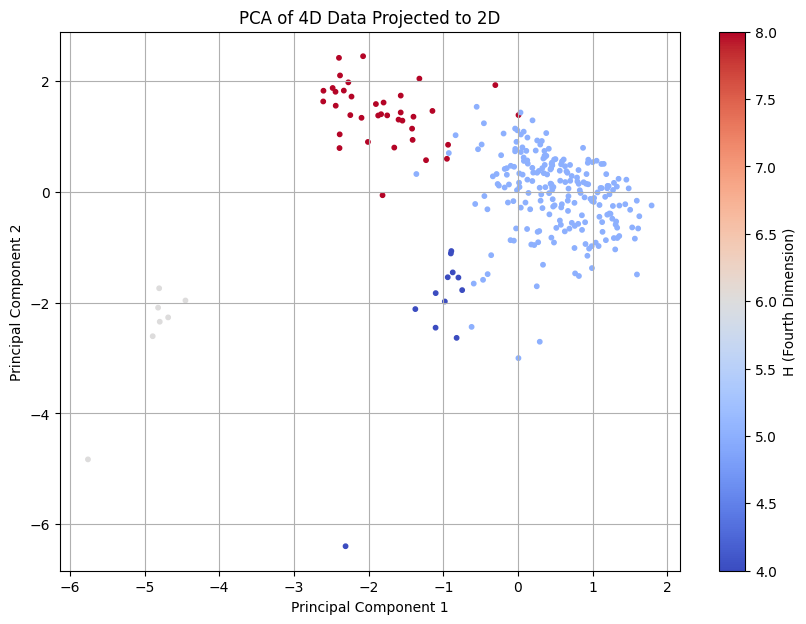

In [ ]:
# Extract relevant columns
x = scaled_families_df['a'].values
y = scaled_families_df['e'].values
z = scaled_families_df['sin_i'].values
color = scaled_families_df['H'].values  # Fourth dimension (color)
g = scaled_families_df['g("/y)'].values  # not included
s = scaled_families_df['s("/y)'].values  # not included

# Combine x, y, z into a single array for PCA
data = np.column_stack((x, y, z, color))

# Perform PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Create a scatter plot of the 2D PCA result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=scaled_families_df['Family_ID'], s=10, alpha=1, cmap='coolwarm')
plt.title('PCA of 4D Data Projected to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='H (Fourth Dimension)')
plt.grid()
plt.show()

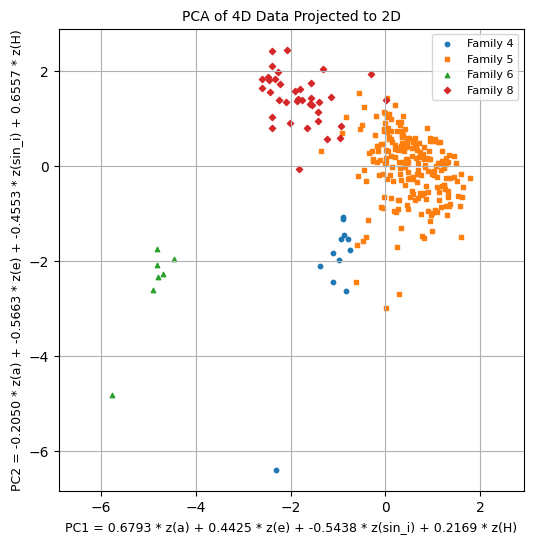

In [ ]:
# Combine x, y, z into a single array for PCA
data = np.column_stack((x, y, z, color))

# Perform PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Output the linear combinations (loadings) for each principal component
components = []
for i, component in enumerate(pca.components_):
    formula = " + ".join(f"{loading:.4f} * {feature}" for loading, feature in zip(component, ['z(a)', 'z(e)', 'z(sin_i)', 'z(H)']))
    components.append(formula)

# Create a scatter plot of the 2D PCA result
plt.figure(figsize=(6, 6))

# Loop through unique Family_IDs and plot each one with a specific marker
for family_id in scaled_families_df['Family_ID'].unique():
    subset = scaled_families_df[scaled_families_df['Family_ID'] == family_id]
    # Find the corresponding PCA coordinates
    subset_pca = data_2d[scaled_families_df['Family_ID'] == family_id]

    plt.scatter(subset_pca[:, 0], subset_pca[:, 1],
                label=f'Family {family_id}',
                marker=markers[family_id],
                s=10)  # Adjust size as needed

# Set titles and labels with formulas
plt.title('PCA of 4D Data Projected to 2D', fontsize=10)
plt.xlabel(f'PC1 = {components[0]}', fontsize=9)
plt.ylabel(f'PC2 = {components[1]}', fontsize=9)

# Set equal aspect ratio
plt.axis('equal')  # Ensure the grid scales are the same

# Add a legend with smaller font size
plt.legend(fontsize=8)
plt.grid()

# Show the plot
plt.show()

# Kmeans

In the following section, we will compare the results of K-means clustering based on the Euclidean distance in two different feature space: a higher dimensional space ($z(a)$, $z(e)$, $z(\sin i)$, $z(H)$) and a lower dimensional space (PC1, PC2).

---

### Addressing limitation 2
Using lower-dimensional representations, we can have easier visualization and reduced computational cost. Morover, the two principal components capture the most significant variance from the original four dimensions, creating a more compact representation that is easier to work with. We expect that the clusters formed by K-means will exhibit better cohesion and separation, and can improve the **Silhouette Average**.

### Addressing limitation 1
Identifying interlopers among L4 Trojan asteroids is an extremely challenging work due to the similarities in their orbital characteristics. We also explored a **consensus clustering method** to report potential interlopers.

Additionally, we proposed quantitative meausures for familiy significance (also called familiy reliability) and degree of confidence in the membership of an asteroid. This is aim to provide objective statistical measures that clarify the observed discrepancies in family searches due to the adopted identification methods. For example, (M. Broˇz, J. Rozehnal 2011) assert that the Eurybates family is the only significant family present in the L4 Trojans. However, our analysis reveals that other families, previously identified in different research, also demonstrate high statistical significance.


> Note: <mark>This is a clustering task, not a classification task.</mark> Asteroid families are **statistical entities**, and there is no definitive ground truth. Even I have labeled my data using the results from David Nesvorny. The primary goal is to reference previous findings, validate my results, and challenge past conclusions. Nesvorny's work is highly respected and considered one of the most significant contributions in the field of asteroid family identification, so I will consistently tie my results to his findings.




## 2D (k=4)

Silhouette Score for k=3: 0.43255290905294097


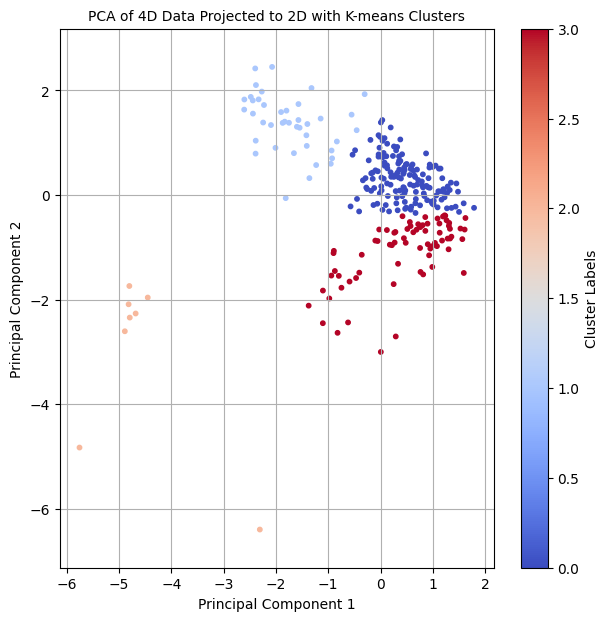

In [ ]:
# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Change n_clusters as needed
kmeans.fit(data_2d)
labels = kmeans.labels_

# Step 5: Create a scatter plot of the PCA result with K-means clusters
plt.figure(figsize=(7, 7))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=10, alpha=1, cmap='coolwarm')
plt.title('PCA of 4D Data Projected to 2D with K-means Clusters', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar for cluster labels
cbar = plt.colorbar(scatter, label='Cluster Labels')


"""
for index in [129, 195]:
    plt.text(data_2d[index, 0], data_2d[index, 1], str(index), fontsize=7, ha='right', color='black')
"""

silhouette_avg = silhouette_score(data_2d, labels)
print("Silhouette Score for k=4:", silhouette_avg)

plt.axis('equal')

plt.grid()
plt.show()

In [ ]:
scaled_families_df['labels_4'] = labels

In [ ]:
# Define custom mapping
mapping = {4: 3, 5: 0, 6: 2, 8: 1}

# Apply the replacement
scaled_families_df['encoded_Family_ID'] = scaled_families_df['Family_ID'].replace(mapping)

In [ ]:
scaled_families_df

,Asteroid_ID,a,e,sin_i,H,"g(""/y)","s(""/y)",Family_ID,labels_4,encoded_Family_ID
0,624,0.387588,0.735344,2.404173,-7.330502,-0.419158,0.458575,4,2,3
1,3548,0.497136,-0.479579,-0.293657,-4.178462,0.619524,-0.414195,5,3,0
2,5258,0.082760,1.246293,-0.385504,-3.741663,0.506597,-0.191100,5,3,0
3,8060,0.216123,1.427964,-0.318332,-3.045145,-0.342869,-0.276906,5,3,0
4,9799,-2.951231,0.110851,5.149982,-4.615262,-3.466445,3.800106,6,2,2
...,...,...,...,...,...,...,...,...,...,...
269,398095,0.230411,0.962433,2.389094,-0.141018,-0.437477,0.583606,4,3,3
270,398104,-0.079180,0.723990,2.380869,0.626332,-0.469850,0.877798,4,3,3
271,398616,1.182999,0.689926,-0.305994,0.378419,-0.728329,-1.291868,5,0,0
272,398800,-0.026787,-0.615833,-0.322445,0.354808,0.500574,0.100641,5,0,0


In [ ]:
from sklearn.metrics import silhouette_samples

In [ ]:
y_true = np.array(scaled_families_df['encoded_Family_ID'])

Confusion Matrix:
        Predicted 0  Predicted 1  Predicted 2  Predicted 3
True 0          151            5            0           62
True 1            1           36            0            0
True 2            0            0            7            0
True 3            0            0            1           11


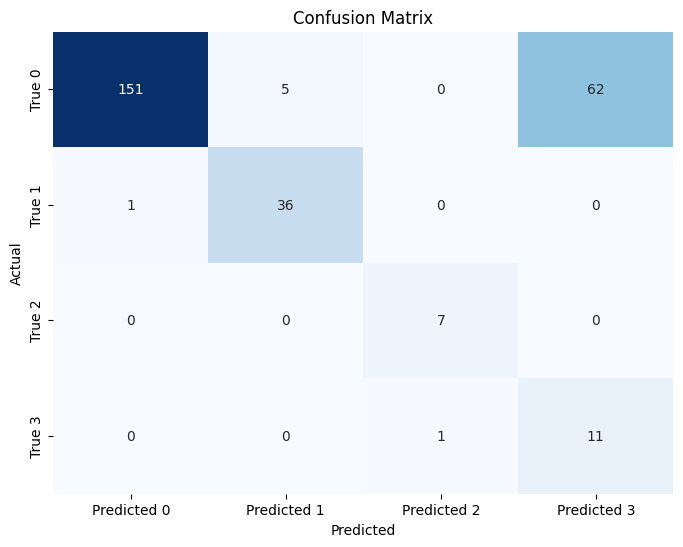

In [ ]:
# Step 1: Calculate the confusion matrix
cm = confusion_matrix(y_true, labels)

# Step 2: Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1', 'True 2', 'True 3'],
                     columns=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3'])

# Step 3: Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Comment: 62 asteroids thought to belong to 3548 Eurybates (Family #4) are grouped with 20961 Arkesilaos (Family #5).

In [ ]:
scaled_families_df['Silhouette Score'] = silhouette_samples(data_2d, labels)

In [ ]:
scaled_families_df

,Asteroid_ID,a,e,sin_i,H,"g(""/y)","s(""/y)",Family_ID,labels_4,encoded_Family_ID,Silhouette Score
0,624,0.387588,0.735344,2.404173,-7.330502,-0.419158,0.458575,4,2,3,0.217804
1,3548,0.497136,-0.479579,-0.293657,-4.178462,0.619524,-0.414195,5,3,0,0.360975
2,5258,0.082760,1.246293,-0.385504,-3.741663,0.506597,-0.191100,5,3,0,0.353014
3,8060,0.216123,1.427964,-0.318332,-3.045145,-0.342869,-0.276906,5,3,0,0.377396
4,9799,-2.951231,0.110851,5.149982,-4.615262,-3.466445,3.800106,6,2,2,0.590285
...,...,...,...,...,...,...,...,...,...,...,...
269,398095,0.230411,0.962433,2.389094,-0.141018,-0.437477,0.583606,4,3,3,0.351205
270,398104,-0.079180,0.723990,2.380869,0.626332,-0.469850,0.877798,4,3,3,0.206090
271,398616,1.182999,0.689926,-0.305994,0.378419,-0.728329,-1.291868,5,0,0,0.144223
272,398800,-0.026787,-0.615833,-0.322445,0.354808,0.500574,0.100641,5,0,0,0.557973


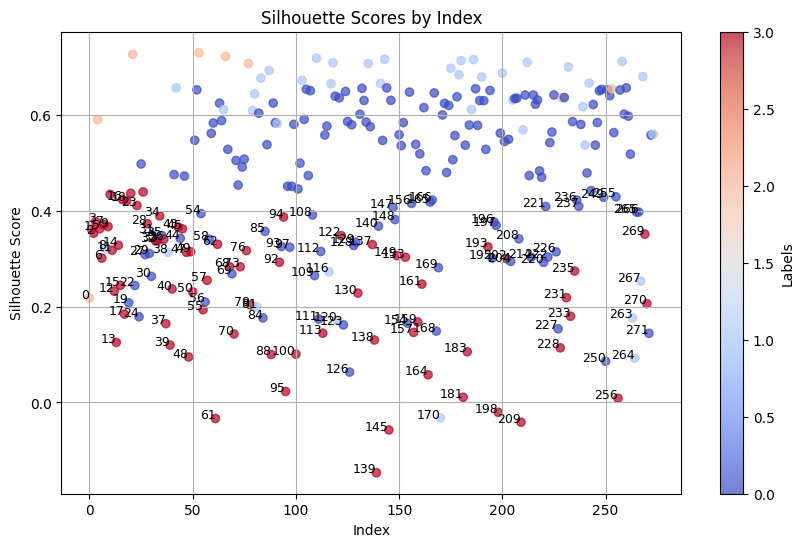

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with color based on labels
scatter = plt.scatter(
    scaled_families_df.index,
    scaled_families_df['Silhouette Score'],
    c=scaled_families_df['labels_4'],  # Color by labels
    cmap='coolwarm',  # Colormap
    alpha=0.7
)

# Add a color bar
plt.colorbar(scatter, label='Labels')

# Annotate points below zero
for i, score in enumerate(scaled_families_df['Silhouette Score']):
    if score < 0.43255290905294097:
        plt.text(i, score, str(i), fontsize=9, ha='right', color='black')

# Customizing the plot
plt.title('Silhouette Scores by Index')
plt.xlabel('Index')
plt.ylabel('Silhouette Score')
plt.grid()

# Show the plot
plt.show()

## 2D (k=3)

Silhouette Score for k=3: 0.5577138688185125


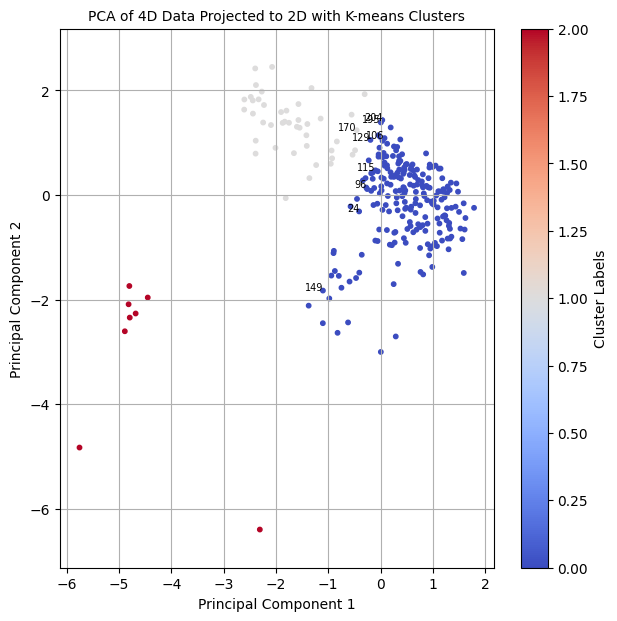

In [ ]:
# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
kmeans.fit(data_2d)
labels = kmeans.labels_

# Step 5: Create a scatter plot of the PCA result with K-means clusters
plt.figure(figsize=(7, 7))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=10, alpha=1, cmap='coolwarm')
plt.title('PCA of 4D Data Projected to 2D with K-means Clusters', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar for cluster labels
cbar = plt.colorbar(scatter, label='Cluster Labels')

for index in [129, 195, 204, 149, 106, 96, 115, 170, 24]:
    plt.text(data_2d[index, 0], data_2d[index, 1], str(index), fontsize=7, ha='right', color='black')

silhouette_avg = silhouette_score(data_2d, labels)
print("Silhouette Score for k=3:", silhouette_avg)

plt.axis('equal')

plt.grid()
plt.show()

In [ ]:
scaled_families_df['labels_3'] = labels

In [ ]:
scaled_families_df['Silhouette Score_3'] = silhouette_samples(data_2d, labels)

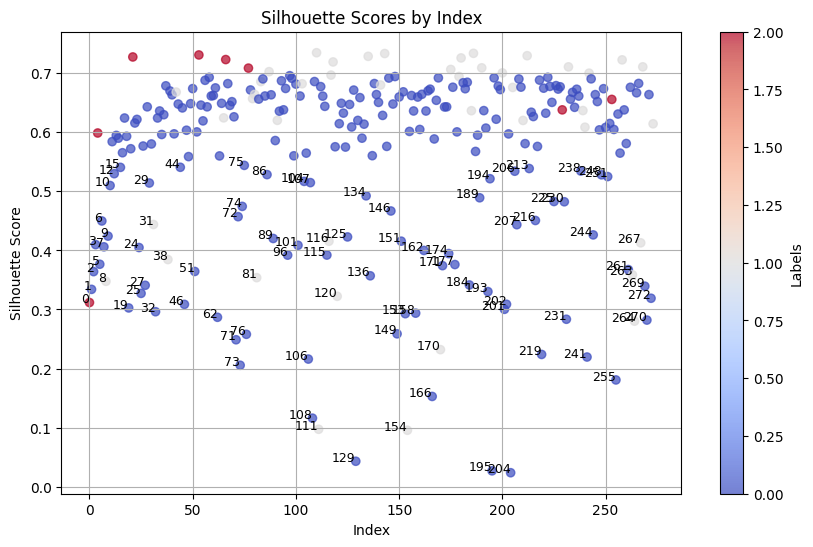

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with color based on labels
scatter = plt.scatter(
    scaled_families_df.index,
    scaled_families_df['Silhouette Score_3'],
    c=scaled_families_df['labels_3'],  # Color by labels
    cmap='coolwarm',  # Colormap
    alpha=0.7
)

# Add a color bar
plt.colorbar(scatter, label='Labels')

# Annotate points below zero
for i, score in enumerate(scaled_families_df['Silhouette Score_3']):
    if score < 0.5577138688185125:
        plt.text(i, score, str(i), fontsize=9, ha='right', color='black')

# Customizing the plot
plt.title('Silhouette Scores by Index')
plt.xlabel('Index')
plt.ylabel('Silhouette Score')
plt.grid()

# Show the plot
plt.show()

## 2D (k=5)

Silhouette Score for k=5: 0.44521271410248425


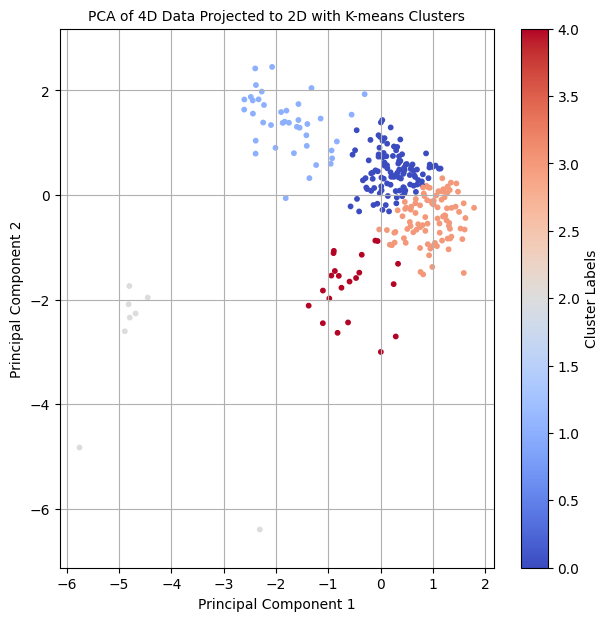

In [ ]:
# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Change n_clusters as needed
kmeans.fit(data_2d)
labels = kmeans.labels_

# Step 5: Create a scatter plot of the PCA result with K-means clusters
plt.figure(figsize=(7, 7))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, s=10, alpha=1, cmap='coolwarm')
plt.title('PCA of 4D Data Projected to 2D with K-means Clusters', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar for cluster labels
cbar = plt.colorbar(scatter, label='Cluster Labels')

'''
for index in [129, 195, 204, 149, 106, 96, 115, 170, 24]:
    plt.text(data_2d[index, 0], data_2d[index, 1], str(index), fontsize=7, ha='right', color='black')
'''

silhouette_avg = silhouette_score(data_2d, labels)
print("Silhouette Score for k=5:", silhouette_avg)

plt.axis('equal')

plt.grid()
plt.show()

In [ ]:
scaled_families_df['labels_5'] = labels

In [ ]:
scaled_families_df['Silhouette Score_5'] = silhouette_samples(data_2d, labels)

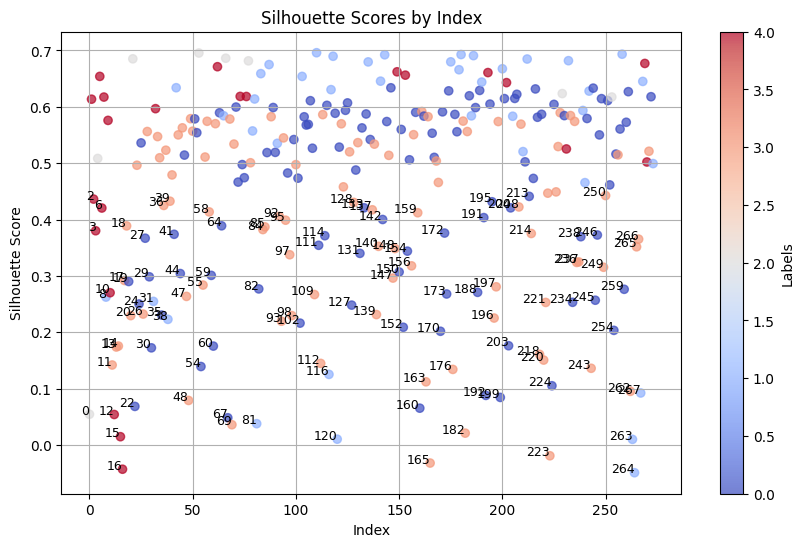

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with color based on labels
scatter = plt.scatter(
    scaled_families_df.index,
    scaled_families_df['Silhouette Score_5'],
    c=scaled_families_df['labels_5'],  # Color by labels
    cmap='coolwarm',  # Colormap
    alpha=0.7
)

# Add a color bar
plt.colorbar(scatter, label='Labels')

# Annotate points below zero
for i, score in enumerate(scaled_families_df['Silhouette Score_5']):
    if score < 0.44521271410248425:
        plt.text(i, score, str(i), fontsize=9, ha='right', color='black')

# Customizing the plot
plt.title('Silhouette Scores by Index')
plt.xlabel('Index')
plt.ylabel('Silhouette Score')
plt.grid()

# Show the plot
plt.show()

## Removing interlopers using the average of the asteroid's silhouette scores at different values of k

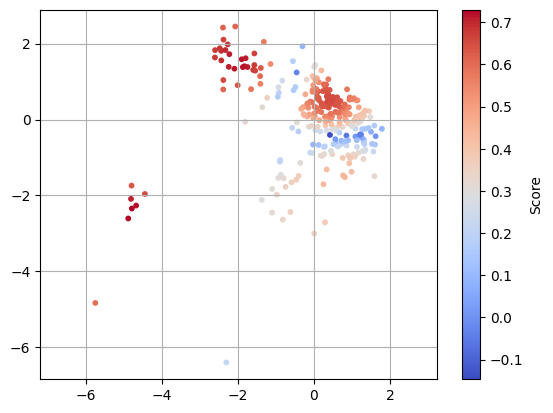

In [ ]:
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], s=10, c=scaled_families_df['Silhouette Score'], alpha=1, cmap='coolwarm')

plt.colorbar(scatter, label='Score')

plt.axis('equal')

plt.grid()
plt.show()

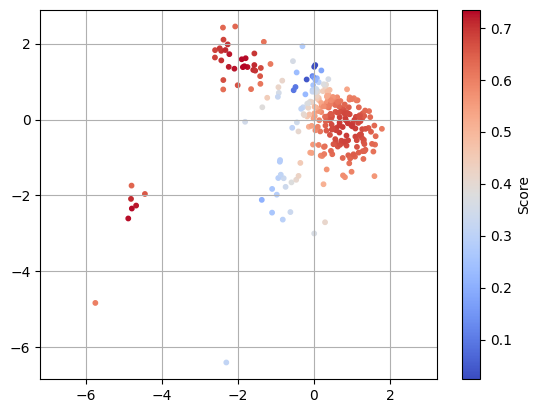

In [ ]:
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], s=10, c=scaled_families_df['Silhouette Score_3'], alpha=1, cmap='coolwarm')

plt.colorbar(scatter, label='Score')

plt.axis('equal')

plt.grid()
plt.show()

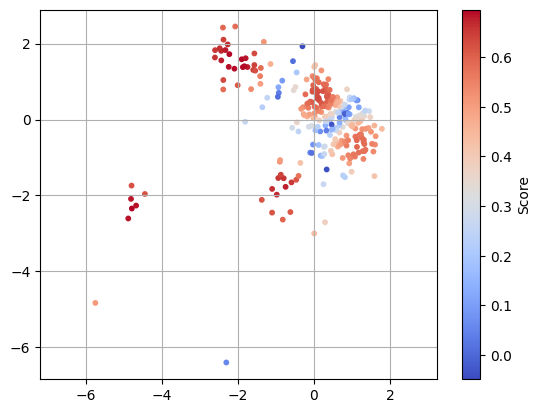

In [ ]:
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], s=10, c=scaled_families_df['Silhouette Score_5'], alpha=1, cmap='coolwarm')

plt.colorbar(scatter, label='Score')

plt.axis('equal')

plt.grid()
plt.show()

In [ ]:
# Calculate the average case silhouette scores of a data point (k=3,4,5)
scaled_families_df['avg_Silhouette Score'] = (
    scaled_families_df['Silhouette Score_5'] +
    scaled_families_df['Silhouette Score_3'] +
    scaled_families_df['Silhouette Score']
) / 3

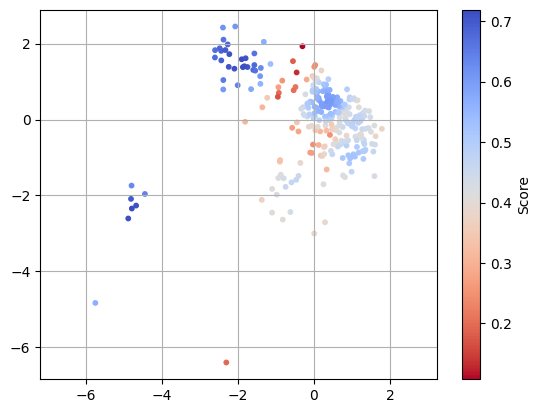

In [ ]:
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], s=10, c=scaled_families_df['avg_Silhouette Score'], alpha=1, cmap='coolwarm_r')

plt.colorbar(scatter, label='Score')

plt.axis('equal')

plt.grid()
plt.show()

In [ ]:
(0.44521271410248425+0.5577138688185125+0.43255290905294097)/3

0.4784931639913126

In [ ]:
new_data_2d =

In [ ]:
scaled_families_df[scaled_families_df['avg_Silhouette Score']>0.4784931639913126]

,Asteroid_ID,a,e,sin_i,H,"g(""/y)","s(""/y)",Family_ID,labels_4,encoded_Family_ID,Silhouette Score,labels_3,Silhouette Score_3,labels_5,Silhouette Score_5,avg_Silhouette Score
4,9799,-2.951231,0.110851,5.149982,-4.615262,-3.466445,3.800106,6,2,2,0.590285,2,0.598830,2,0.508396,0.565837
21,89938,-2.613063,-0.070820,5.167803,-1.262531,-3.686277,3.751074,6,2,2,0.726522,2,0.727573,2,0.685116,0.713071
23,111805,0.968667,0.735344,-0.314219,-1.038228,-0.729332,-0.992773,5,3,0,0.410893,0,0.621851,3,0.496370,0.509705
28,163189,0.811490,0.928369,-0.304624,-0.648650,-0.503728,-0.843225,5,3,0,0.373060,0,0.643115,3,0.556179,0.524118
33,191088,1.359228,0.826180,-0.277207,-0.636845,-0.499964,-1.571351,5,3,0,0.337786,0,0.624256,3,0.547183,0.503075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,392462,-0.026787,-0.468225,-0.290915,0.484667,0.490536,0.100641,5,0,0,0.597406,0,0.367493,0,0.626848,0.530583
266,396159,0.049420,1.427964,-0.333411,1.004105,0.483760,-0.166584,5,0,0,0.397286,0,0.682718,3,0.365248,0.481751
268,396412,-1.527113,-1.410642,0.039459,0.520084,0.165556,1.277409,8,1,1,0.680155,1,0.710819,1,0.645032,0.678669
272,398800,-0.026787,-0.615833,-0.322445,0.354808,0.500574,0.100641,5,0,0,0.557973,0,0.318994,0,0.617905,0.498291


In [ ]:
indices_list = scaled_families_df[scaled_families_df['avg_Silhouette Score'] > 0.4784931639913126].index.tolist()

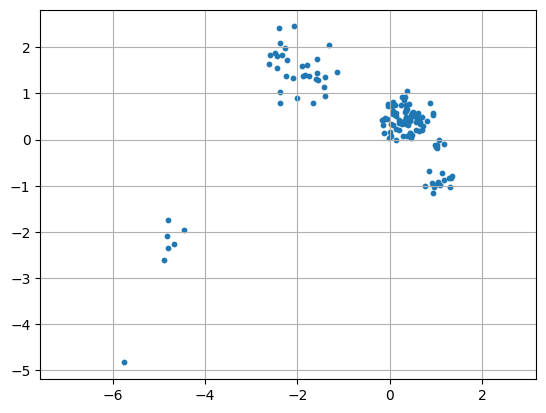

In [ ]:
scatter = plt.scatter(data_2d[indices_list, 0], data_2d[indices_list, 1], s=10, alpha=1)

# plt.colorbar(scatter, label='Score')

plt.axis('equal')

plt.grid()
plt.show()

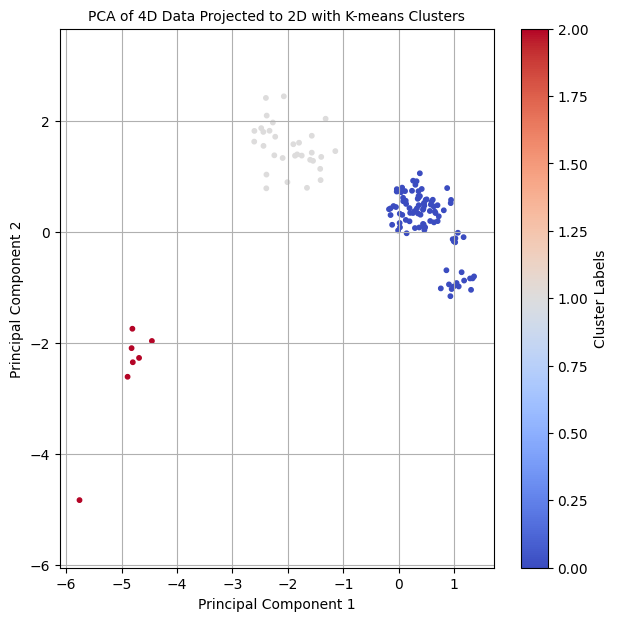

In [ ]:
# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
kmeans.fit(data_2d[indices_list, :])
labels = kmeans.labels_

# Step 5: Create a scatter plot of the PCA result with K-means clusters
plt.figure(figsize=(7, 7))
scatter = plt.scatter(data_2d[indices_list, 0], data_2d[indices_list, 1], c=labels, s=10, alpha=1, cmap='coolwarm')
plt.title('PCA of 4D Data Projected to 2D with K-means Clusters', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar for cluster labels
cbar = plt.colorbar(scatter, label='Cluster Labels')


"""
for index in [129, 195]:
    plt.text(data_2d[index, 0], data_2d[index, 1], str(index), fontsize=7, ha='right', color='black')
"""

"""
silhouette_avg = silhouette_score(data_2d, labels)
print("Silhouette Score for k=4:", silhouette_avg)
"""

plt.axis('equal')

plt.grid()
plt.show()

## 4D (k=4)

<ipython-input-183-137b593e9848>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)  # Get a colormap with n_clusters colors


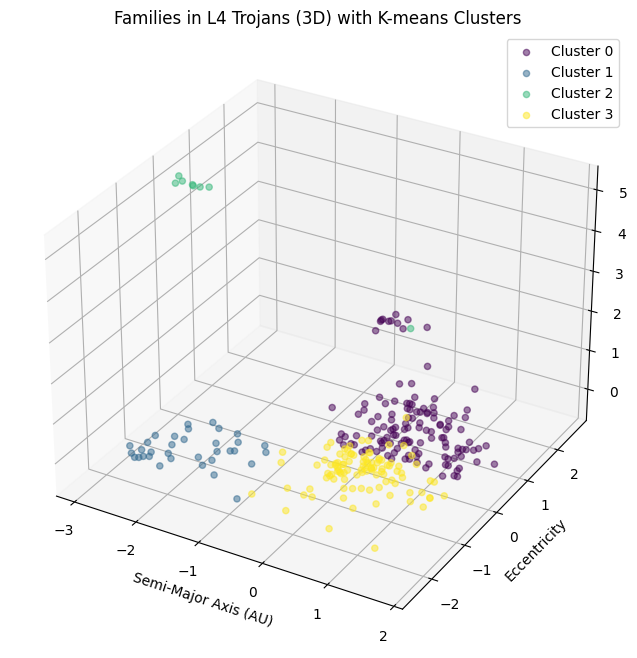

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare the data for K-means
data_4d = scaled_families_df[['a', 'e', 'sin_i', 'H']].values

# Apply K-means clustering
n_clusters = 4  # Adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
scaled_families_df['KMeans_Cluster'] = kmeans.fit_predict(data_4d)

# Optional: Highlight the K-means clusters with unique colors
colors = plt.cm.get_cmap('viridis', n_clusters)  # Get a colormap with n_clusters colors
for cluster_id in range(n_clusters):
    cluster_subset = scaled_families_df[scaled_families_df['KMeans_Cluster'] == cluster_id]
    ax.scatter(cluster_subset['a'], cluster_subset['e'], cluster_subset['sin_i'],
               color=colors(cluster_id),
               s=20,  # Adjust size for clusters
               alpha=0.5,
               label=f'Cluster {cluster_id}')

# Set labels and title
ax.set_xlabel('Semi-Major Axis (AU)')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Inclination (sin_i)')
ax.set_title('Families in L4 Trojans (3D) with K-means Clusters')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()

In [ ]:
silhouette_avg = silhouette_score(data_4d, scaled_families_df['KMeans_Cluster'])
print("Silhouette Score for k=3:", silhouette_avg)

Silhouette Score for k=3: 0.2828095439483218
